In [1]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, rand_score

# Loading all the important datasets used in q1
x_raw_data = np.load('./x_raw_data.npy')
y_raw_data = np.load('./y_raw_data.npy')
x_pca_data = np.load('./x_pca_data.npy')
y_pca_data = np.load('./y_pca_data.npy')

x_ten_data = np.load('./x_ten_data.npy')
y_ten_data = np.load('./y_ten_data.npy')
x_ten_pca_data = np.load('./x_ten_pca_data.npy')
y_ten_pca_data = np.load('./y_ten_pca_data.npy')

**2a.** K-Means Clustering

In [3]:
# returns kmeans object trained on x_data
def cluster(x_data, n=10):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(x_data)
    # print(kmeans.labels_)
    # print(kmeans.cluster_centers_)
    return kmeans

In [8]:
# returns data points closest to the centroid of each cluster
def closest_images(kmeans, x_data):
    closest_images = np.empty((0,x_raw_data.shape[1]))
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    for i in range(max(kmeans.labels_) + 1):
        cluster_data_points = x_data[labels == i]
        cluster_centroid = centroids[i]
        distances = np.linalg.norm(cluster_data_points - cluster_centroid,axis=1)
        closest_images = np.append(closest_images, [x_raw_data[np.argmin(distances)]], axis=0)  # use original data of image

    # print(closest_images)
    return closest_images

In [6]:
def label_clusters(kmean, y_data):
    cluster_to_label = np.empty((0,))
    labels = kmean.labels_
    for i in range(0,max(kmean.labels_) + 1):
        temp = y_data[labels == i]
        mode = st.mode(temp).mode
        cluster_to_label = np.append(cluster_to_label,mode)

        # for anaylsis of composition of each cluster
        counts = {j:0 for j in range(0,10)}     # count frequency of digits in cluster
        for j in temp:
            counts[int(j%10)] += 1
        print('cluster', i, '-->', counts)

    # print(cluster_to_label)
    return cluster_to_label


In [7]:
kmeans_raw = cluster(x_raw_data)
closest_images_raw = closest_images(kmeans_raw, x_raw_data)
cluster_to_label_raw = label_clusters(kmeans_raw,y_raw_data)

/home/rajiv/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[181. 196. 199. ...  74.  66.  77.]
 [199. 194. 172. ... 195. 187. 174.]
 [108.  98.  91. ... 146. 145. 147.]
 ...
 [ 72.  72.  89. ...  79.  34.  34.]
 [128. 119. 162. ... 127. 117. 169.]
 [ 72.  71.  66. ... 102.  95.  90.]]
cluster 0 --> {0: 347, 1: 284, 2: 284, 3: 298, 4: 324, 5: 333, 6: 313, 7: 334, 8: 342, 9: 328}
cluster 1 --> {0: 276, 1: 286, 2: 312, 3: 295, 4: 307, 5: 324, 6: 284, 7: 317, 8: 280, 9: 320}
cluster 2 --> {0: 374, 1: 361, 2: 401, 3: 410, 4: 377, 5: 373, 6: 389, 7: 396, 8: 406, 9: 369}
cluster 3 --> {0: 122, 1: 118, 2: 113, 3: 125, 4: 127, 5: 118, 6: 129, 7: 119, 8: 117, 9: 115}
cluster 4 --> {0: 24, 1: 200, 2: 145, 3: 123, 4: 101, 5: 93, 6: 95, 7: 93, 8: 75, 9: 74}
cluster 5 --> {0: 279, 1: 228, 2: 204, 3: 217, 4: 253, 5: 222, 6: 192, 7: 184, 8: 234, 9: 227}
cluster 6 --> {0: 236, 1: 231, 2: 274, 3: 239, 4: 223, 5: 225, 6: 240, 7: 230, 8: 226, 9: 232}
cluster 7 --> {0: 285, 1: 324, 2: 307, 3: 321, 4: 305, 5: 324, 6: 325, 7: 328, 8: 295, 9: 377}
cluster 8 --> {0: 

/tmp/ipykernel_9781/1287390342.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = st.mode(temp).mode


In [9]:
kmeans_ten = cluster(x_pca_data[:,:10])
closest_images_ten = closest_images(kmeans_ten, x_pca_data[:,:10])
cluster_to_label_ten = label_clusters(kmeans_ten,y_pca_data)

/home/rajiv/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster 0 --> {0: 339, 1: 293, 2: 282, 3: 298, 4: 309, 5: 313, 6: 327, 7: 340, 8: 316, 9: 291}
cluster 1 --> {0: 355, 1: 375, 2: 336, 3: 348, 4: 339, 5: 308, 6: 338, 7: 374, 8: 361, 9: 356}
cluster 2 --> {0: 219, 1: 298, 2: 284, 3: 281, 4: 289, 5: 238, 6: 235, 7: 225, 8: 219, 9: 229}
cluster 3 --> {0: 204, 1: 218, 2: 269, 3: 236, 4: 217, 5: 245, 6: 224, 7: 226, 8: 222, 9: 215}
cluster 4 --> {0: 349, 1: 287, 2: 341, 3: 303, 4: 257, 5: 345, 6: 334, 7: 338, 8: 345, 9: 322}
cluster 5 --> {0: 123, 1: 140, 2: 126, 3: 138, 4: 131, 5: 132, 6: 144, 7: 132, 8: 130, 9: 130}
cluster 6 --> {0: 157, 1: 118, 2: 107, 3: 115, 4: 134, 5: 96, 6: 142, 7: 132, 8: 132, 9: 111}
cluster 7 --> {0: 301, 1: 345, 2: 321, 3: 354, 4: 316, 5: 348, 6: 341, 7: 337, 8: 325, 9: 402}
cluster 8 --> {0: 181, 1: 136, 2: 110, 3: 130, 4: 199, 5: 155, 6: 138, 7: 80, 8: 161, 9: 120}
cluster 9 --> {0: 272, 1: 290, 2: 324, 3: 297, 4: 309, 5: 320, 6: 277, 7: 316, 8: 289, 9: 324}


/tmp/ipykernel_9781/1287390342.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = st.mode(temp).mode


In [10]:
kmeans_26 = cluster(x_pca_data[:,:26])
closest_images_26 = closest_images(kmeans_26, x_pca_data[:,:26])
cluster_to_label_26 = label_clusters(kmeans_26,y_pca_data)

/home/rajiv/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster 0 --> {0: 270, 1: 228, 2: 205, 3: 216, 4: 255, 5: 214, 6: 191, 7: 178, 8: 227, 9: 224}
cluster 1 --> {0: 24, 1: 211, 2: 145, 3: 126, 4: 97, 5: 89, 6: 95, 7: 100, 8: 73, 9: 79}
cluster 2 --> {0: 390, 1: 345, 2: 339, 3: 345, 4: 324, 5: 355, 6: 375, 7: 364, 8: 358, 9: 332}
cluster 3 --> {0: 240, 1: 233, 2: 282, 3: 241, 4: 229, 5: 236, 6: 245, 7: 234, 8: 237, 9: 238}
cluster 4 --> {0: 122, 1: 120, 2: 115, 3: 125, 4: 127, 5: 119, 6: 130, 7: 119, 8: 118, 9: 115}
cluster 5 --> {0: 167, 1: 120, 2: 107, 3: 118, 4: 134, 5: 122, 6: 149, 7: 126, 8: 143, 9: 108}
cluster 6 --> {0: 290, 1: 303, 2: 307, 3: 315, 4: 298, 5: 327, 6: 315, 7: 335, 8: 296, 9: 376}
cluster 7 --> {0: 263, 1: 284, 2: 309, 3: 293, 4: 308, 5: 318, 6: 278, 7: 305, 8: 275, 9: 319}
cluster 8 --> {0: 385, 1: 365, 2: 400, 3: 409, 4: 398, 5: 389, 6: 403, 7: 400, 8: 425, 9: 379}
cluster 9 --> {0: 349, 1: 291, 2: 291, 3: 312, 4: 330, 5: 331, 6: 319, 7: 339, 8: 348, 9: 330}


/tmp/ipykernel_9781/1287390342.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = st.mode(temp).mode


We can observe that each cluster created by the each of the three kmeans model has some amount of images from all the labels/digits.

In [17]:
def display_ten_samples(samples):
    plt.figure(figsize=(25,10))
    for i in range(0,10):
        ax = plt.subplot2grid((2,5), (i//5,i%5))
        features = samples[i].astype('uint8').reshape((32,32,3))
        ax.set_title('Cluster {}'.format(i))
        ax.imshow(features)

# def features_to_image(features):
#     features = features.astype('uint8').reshape((32,32,3))
#     plt.figure(figsize=(2,2))
#     plt.imshow(features)
#     # plt.imshow(features_reconstructed)

# for img in closest_images_raw:
#     features_to_image(img)

# for img in closest_images_ten:
#     features_to_image(img)

# for img in closest_images_26:
#     features_to_image(img)

Displaying images closest to centroids of each cluster.

For k-means on raw data

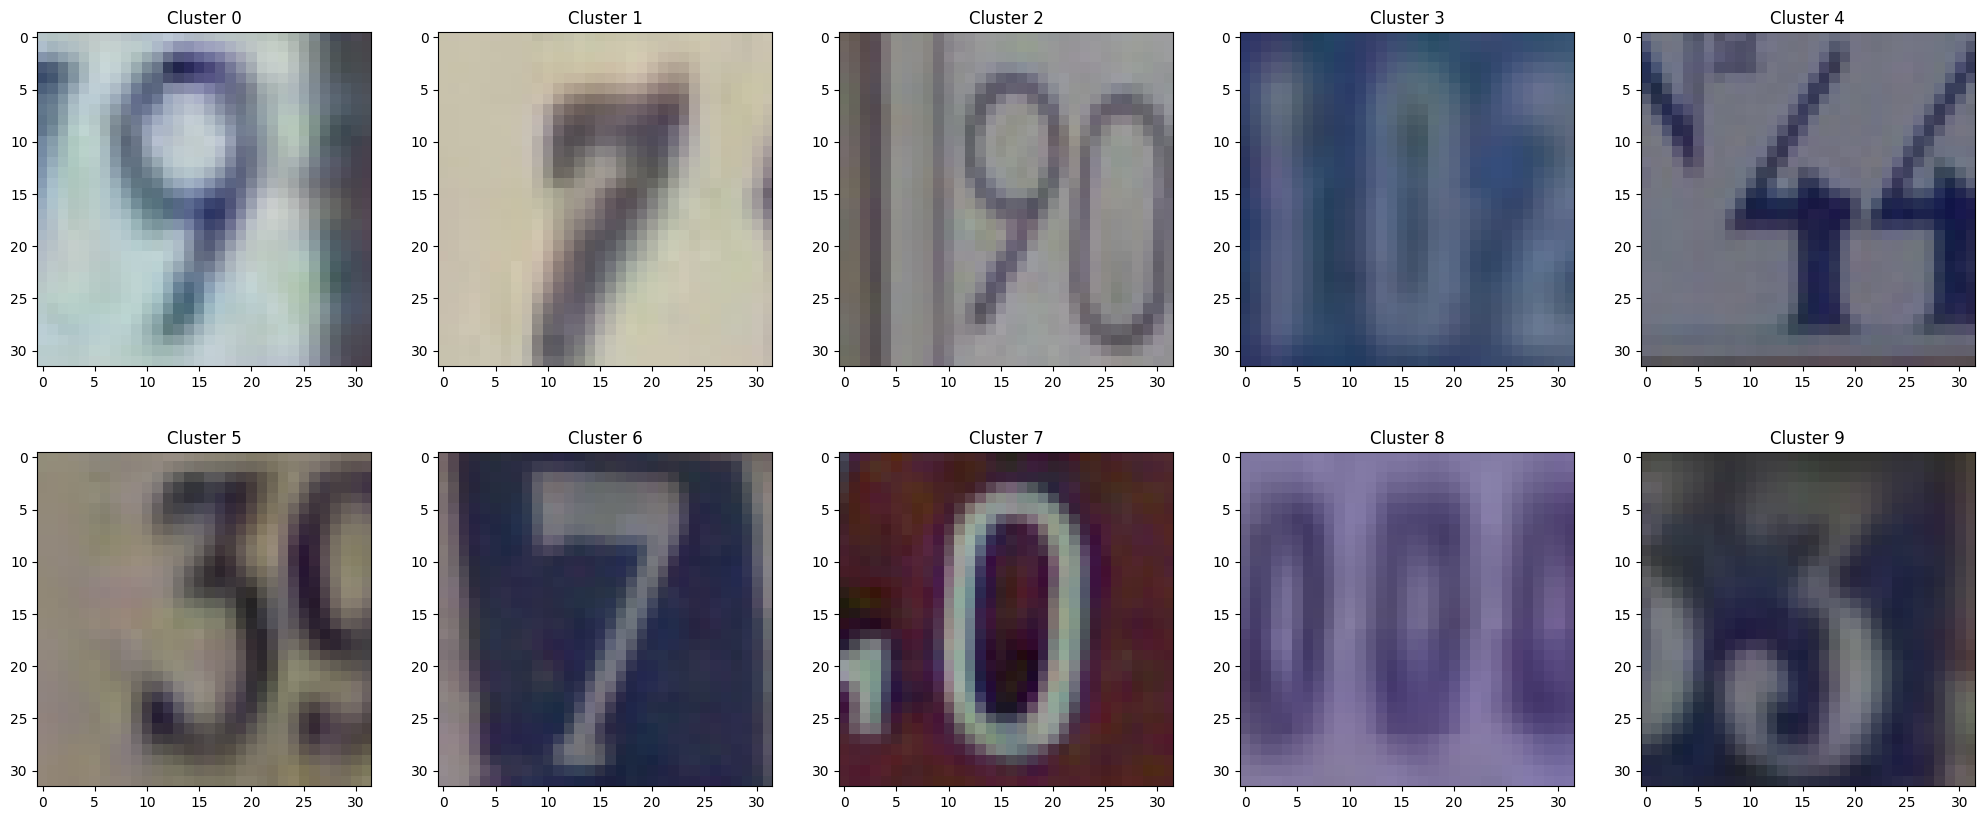

In [18]:
display_ten_samples(closest_images_raw)

For k-means using 10 PCA eigenvectors

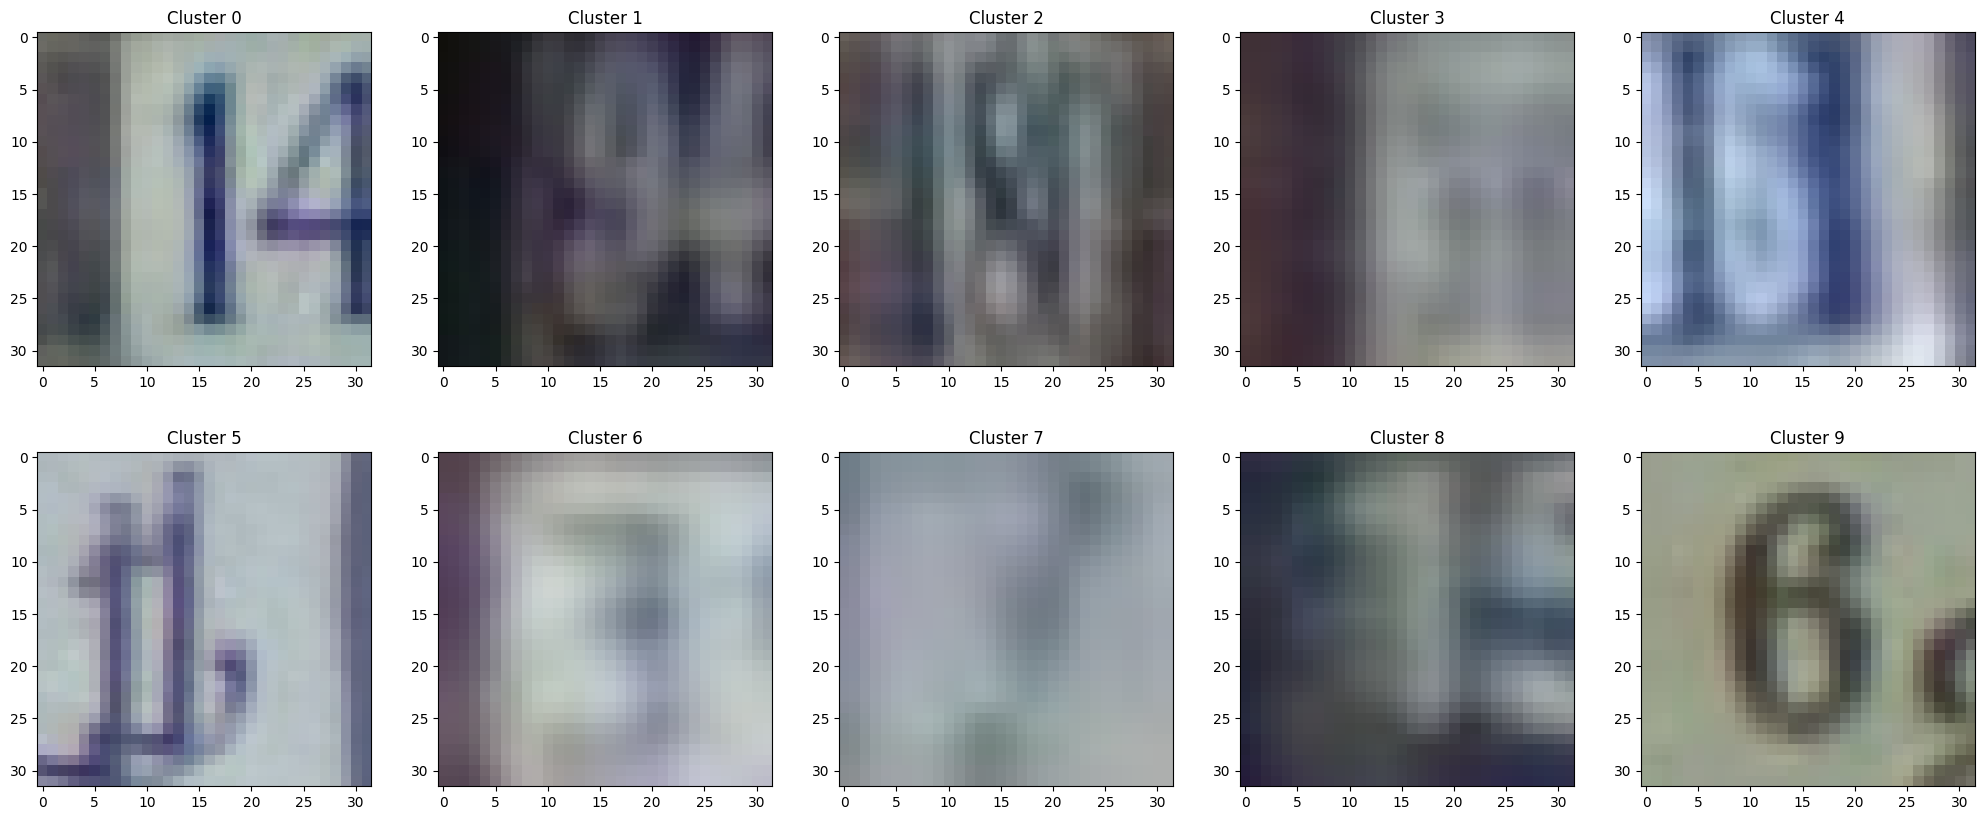

In [19]:
display_ten_samples(closest_images_ten)

For k-means using 26 PCA eigenvectors

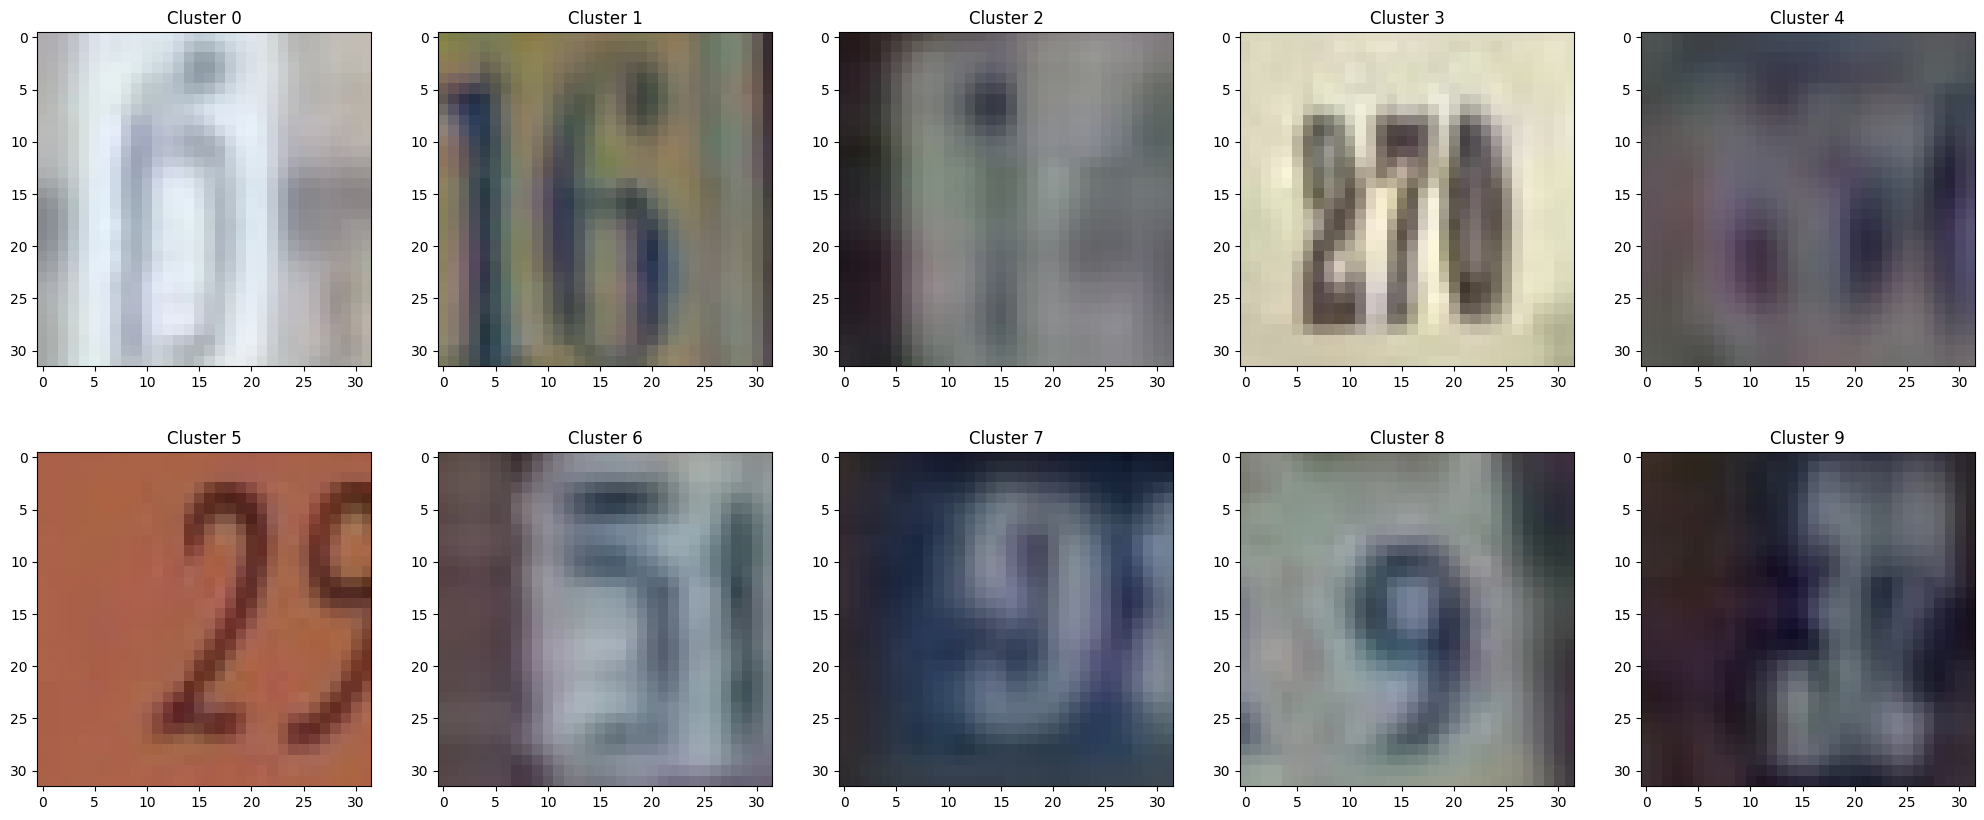

In [20]:
display_ten_samples(closest_images_26)

**2b.** Sum Squared Error, purity and rand score

In [21]:
def calculate_sse(kmeans,x_data):
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sse = 0
    k = max(kmeans.labels_) 
    for i in range(k+ 1):
        cluster_data_points = x_data[labels == i]
        sse += np.sum((cluster_data_points - centroids[i])**2)
        
    return sse

In [22]:
# Purity measures the extent to which all the data points in a cluster belong to the same class
def calculate_purity(kmean,x_data,y_data):
    y_pred = kmean.predict(x_data)
    # TODO: map from cluster_num to label

    conf_mat = confusion_matrix(y_data,y_pred)
    purity = np.sum(np.amax(conf_mat,axis=0)) / np.sum(conf_mat)

    return purity

In [23]:
# Rand-index is a measure of similarity between true and predicted clusterings
def calculate_rand_index(kmean,x_data,y_data):
    y_pred = kmean.predict(x_data)
    rand_index = rand_score(y_data,y_pred)

    return rand_index

For k-means on raw data:

In [24]:
sse_raw = calculate_sse(kmeans_raw,x_raw_data)
purity_raw = calculate_purity(kmeans_raw,x_raw_data,y_raw_data)
rand_index_raw = calculate_rand_index(kmeans_raw,x_raw_data,y_raw_data)

print(purity_raw)
print(rand_index_raw)
print(sse_raw)

0.11588
0.8076597207888315
80764075692.09238


For k-means using 10 PCA eigenvectors:

In [26]:
sse_ten = calculate_sse(kmeans_ten,x_pca_data[:,:10])
purity_ten = calculate_purity(kmeans_ten,x_pca_data[:,:10],y_pca_data)
rand_index_ten = calculate_rand_index(kmeans_ten,x_pca_data[:,:10],y_pca_data)

print(purity_ten)
print(rand_index_ten)
print(sse_ten)

0.11428
0.8110407136285451
45448281343.520744


For k-means using 26 PCA eigenvectors:

In [27]:
sse_26 = calculate_sse(kmeans_26,x_pca_data[:,:26])
purity_26 = calculate_purity(kmeans_26,x_pca_data[:,:26],y_pca_data)
rand_index_26 = calculate_rand_index(kmeans_26,x_pca_data[:,:26],y_pca_data)

print(purity_26)
print(rand_index_26)
print(sse_26)

0.11676
0.8077448729949198
60848783018.1138


**2c.**  

In [28]:
print('Cluster to class mapping according to frequencies in kmeans_raw -> ', cluster_to_label_raw)
y_pred_raw = cluster_to_label_raw[kmeans_raw.predict(x_raw_data)]
accuracy_raw = accuracy_score(y_raw_data,y_pred_raw)
print('Accuracy of Kmeans_raw is ',accuracy_raw)

print('Cluster to class mapping according to frequencies in kmeans_ten -> ', cluster_to_label_ten)
y_pred_ten = cluster_to_label_ten[kmeans_ten.predict(x_pca_data[:,:10])]
accuracy_ten = accuracy_score(y_pca_data,y_pred_ten)
print('Accuracy of Kmeans_ten is ',accuracy_ten)

print('Cluster to class mapping according to frequencies in kmeans_26 -> ', cluster_to_label_26)
y_pred_26 = cluster_to_label_26[kmeans_26.predict(x_pca_data[:,:26])]
accuracy_26 = accuracy_score(y_pca_data,y_pred_26)
print('Accuracy of Kmeans_26 is ',accuracy_26)

Cluster to class mapping according to frequencies in kmeans_raw ->  [10.  5.  3.  6.  1. 10.  2.  9. 10. 10.]
Accuracy of Kmeans_raw is  0.11588
Cluster to class mapping according to frequencies in kmeans_ten ->  [ 7.  1.  1.  2. 10.  6. 10.  9.  4.  2.]
Accuracy of Kmeans_ten is  0.11428
Cluster to class mapping according to frequencies in kmeans_26 ->  [10.  1. 10.  2.  6. 10.  9.  9.  8. 10.]
Accuracy of Kmeans_26 is  0.11676


**2d.** 

In [29]:
# k = 5
kmeans_26_k5 = cluster(x_pca_data[:,:26],5)

/home/rajiv/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
sse = calculate_sse(kmeans_26_k5,x_pca_data[:,:26])
print('Sum Squared Error for this case = ',sse)
labels = label_clusters(kmeans_26_k5,y_pca_data)
print(labels)

Sum Squared Error for this case =  70651771136.56181
cluster 0 --> {0: 197, 1: 188, 2: 177, 3: 210, 4: 182, 5: 176, 6: 202, 7: 179, 8: 194, 9: 173}
cluster 1 --> {0: 651, 1: 647, 2: 607, 3: 664, 4: 671, 5: 626, 6: 658, 7: 617, 8: 660, 9: 620}
cluster 2 --> {0: 438, 1: 463, 2: 483, 3: 491, 4: 455, 5: 494, 6: 469, 7: 509, 8: 456, 9: 503}
cluster 3 --> {0: 471, 1: 495, 2: 514, 3: 427, 4: 461, 5: 466, 6: 463, 7: 467, 8: 458, 9: 446}
cluster 4 --> {0: 743, 1: 707, 2: 719, 3: 708, 4: 731, 5: 738, 6: 708, 7: 728, 8: 732, 9: 758}
[3. 4. 7. 2. 9.]


/tmp/ipykernel_9781/1287390342.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = st.mode(temp).mode


We can observe that each cluster created by the k-means model has some amount of images from all the labels/digits.